In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
asthma = pd.read_csv('merged.csv')
asthma.head(10)

,Unnamed: 0,year,fips,state_name,county_name,arithmetic_mean|Carbon monoxide,arithmetic_mean|Nitrogen dioxide (NO2),arithmetic_mean|Ozone,arithmetic_mean|PM2.5 - Local Conditions,arithmetic_standard_dev|Carbon monoxide,...,sex,asthma_deaths_per_100k,asthma_lb,asthma_ub,current_smoking_pct,current_smoking_lb,current_smoking_ub,daily_smoker_pct,daily_smoker_lb,daily_smoker_ub
0,0,1996,10001,Delaware,Kent,0.000000,0.000000,0.052134,0.0,0.000000,...,Both,2.016585,1.682840,2.418712,27.85,25.41,30.42,24.97,22.72,27.48
1,1,1996,10003,Delaware,New Castle,0.777178,19.040930,0.045973,0.0,0.349306,...,Both,1.738850,1.518789,2.009553,25.38,23.46,27.31,21.43,19.76,23.18
2,2,1996,10005,Delaware,Sussex,0.000000,0.000000,0.048738,0.0,0.000000,...,Both,1.693894,1.426025,1.998171,28.77,26.22,31.37,25.79,23.31,28.02
3,3,1996,12003,Florida,Baker,0.000000,0.000000,0.040651,0.0,0.000000,...,Both,1.995325,1.561440,2.510761,29.25,24.59,34.13,26.08,21.83,30.95
4,4,1996,12009,Florida,Brevard,0.000000,0.000000,0.038388,0.0,0.000000,...,Both,1.334301,1.149089,1.550314,28.50,24.56,32.46,24.41,21.30,28.26
5,5,1996,12011,Florida,Broward,0.735181,8.580437,0.035056,0.0,0.409056,...,Both,1.611282,1.459068,1.795843,24.35,21.94,27.04,19.38,17.07,21.88
6,6,1996,12031,Florida,Duval,0.665576,14.918262,0.039973,0.0,0.406632,...,Both,2.610711,2.342217,2.923261,25.00,22.12,28.07,21.55,18.91,24.67
7,7,1996,12033,Florida,Escambia,0.000000,0.000000,0.043519,0.0,0.000000,...,Both,2.162940,1.814438,2.560791,26.65,23.06,30.58,22.49,19.33,26.00
8,8,1996,12057,Florida,Hillsborough,0.962998,8.173658,0.042099,0.0,0.383495,...,Both,1.940450,1.724976,2.194718,24.99,22.22,28.15,21.21,18.58,24.03
9,9,1996,12059,Florida,Holmes,0.000000,0.000000,0.036669,0.0,0.000000,...,Both,1.844812,1.340278,2.470405,29.83,24.96,34.96,25.86,21.28,31.16


In [3]:
asthma.columns

Index(['Unnamed: 0', 'year', 'fips', 'state_name', 'county_name',
       'arithmetic_mean|Carbon monoxide',
       'arithmetic_mean|Nitrogen dioxide (NO2)', 'arithmetic_mean|Ozone',
       'arithmetic_mean|PM2.5 - Local Conditions',
       'arithmetic_standard_dev|Carbon monoxide',
       'arithmetic_standard_dev|Nitrogen dioxide (NO2)',
       'arithmetic_standard_dev|Ozone',
       'arithmetic_standard_dev|PM2.5 - Local Conditions',
       'fifty_percentile|Carbon monoxide',
       'fifty_percentile|Nitrogen dioxide (NO2)', 'fifty_percentile|Ozone',
       'fifty_percentile|PM2.5 - Local Conditions',
       'first_max_value|Carbon monoxide',
       'first_max_value|Nitrogen dioxide (NO2)', 'first_max_value|Ozone',
       'first_max_value|PM2.5 - Local Conditions',
       'fourth_max_value|Carbon monoxide',
       'fourth_max_value|Nitrogen dioxide (NO2)', 'fourth_max_value|Ozone',
       'fourth_max_value|PM2.5 - Local Conditions',
       'latitude|Nitrogen dioxide (NO2)', 'longitude

In [4]:
X = asthma[['current_smoking_pct','arithmetic_mean|Carbon monoxide',
       'arithmetic_mean|Nitrogen dioxide (NO2)', 'arithmetic_mean|Ozone',
       'arithmetic_mean|PM2.5 - Local Conditions',]]
y = asthma[['asthma_deaths_per_100k']].values.reshape(-1, 1)
print(X.shape, y.shape)

(12822, 5) (12822, 1)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train) 
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.18695370669261535
Testing Score: 0.17949667847149475


Text(0.5, 1.0, 'Residual Plot')

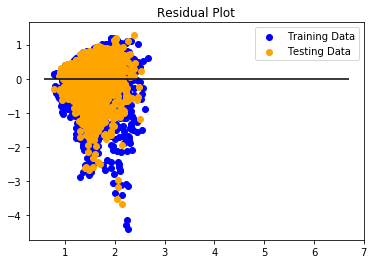

In [62]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTIONb

In [63]:
print(model.predict(X_test))

[[1.47344208]
 [1.62160091]
 [2.05232363]
 ...
 [1.29486851]
 [1.481566  ]
 [1.32307552]]


In [64]:
predicted_deaths = pd.DataFrame(model.predict(X_test))
print(predicted_deaths)



             0
0     1.473442
1     1.621601
2     2.052324
3     2.143933
4     1.655583
5     1.628140
6     1.630166
7     1.377147
8     1.506132
9     1.485071
10    1.816366
11    1.276557
12    1.176043
13    1.377674
14    1.327826
15    1.479445
16    1.553988
17    1.950724
18    1.423134
19    1.686228
20    1.141369
21    1.518719
22    1.434590
23    1.544643
24    1.436804
25    1.479589
26    1.361147
27    1.414125
28    1.579380
29    1.267259
...        ...
3176  1.870776
3177  1.381812
3178  1.371285
3179  1.563172
3180  1.520780
3181  1.488113
3182  1.525809
3183  1.558761
3184  1.954584
3185  1.514910
3186  1.762813
3187  1.868625
3188  1.373140
3189  1.439081
3190  1.426441
3191  1.509061
3192  1.504739
3193  1.262796
3194  1.525602
3195  1.361873
3196  1.576991
3197  1.394523
3198  1.375177
3199  1.776611
3200  1.408374
3201  1.568935
3202  1.693640
3203  1.294869
3204  1.481566
3205  1.323076

[3206 rows x 1 columns]
